In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Price'] = data.target

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


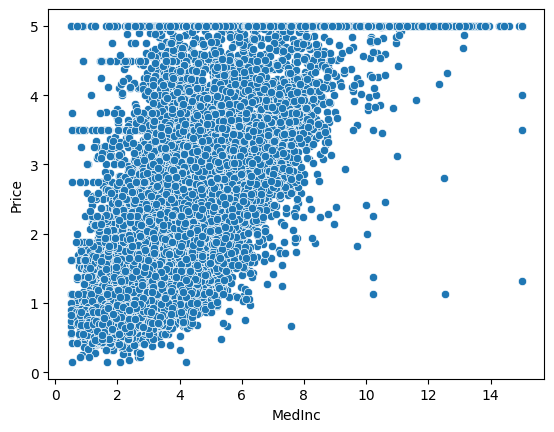

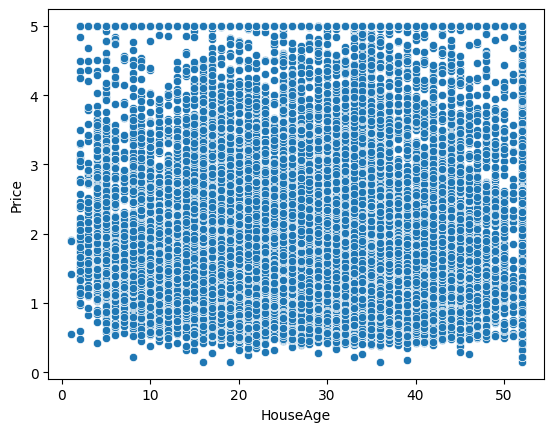

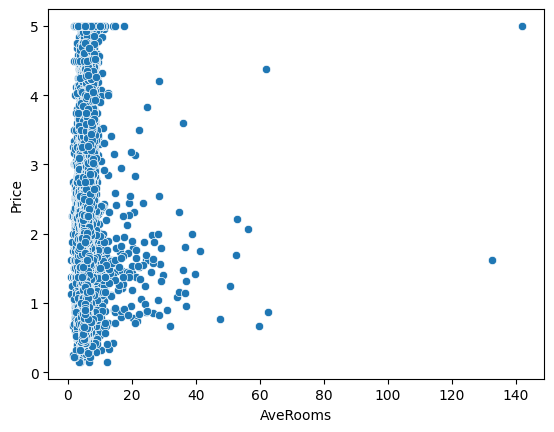

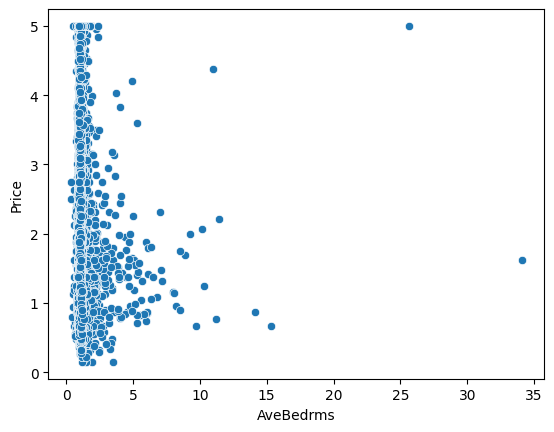

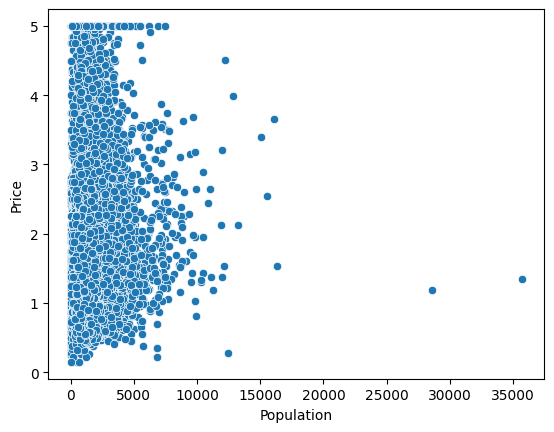

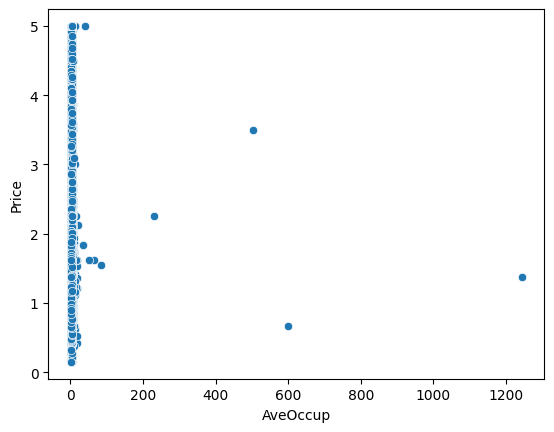

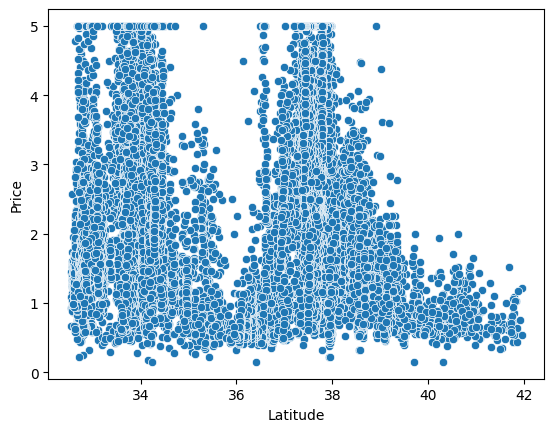

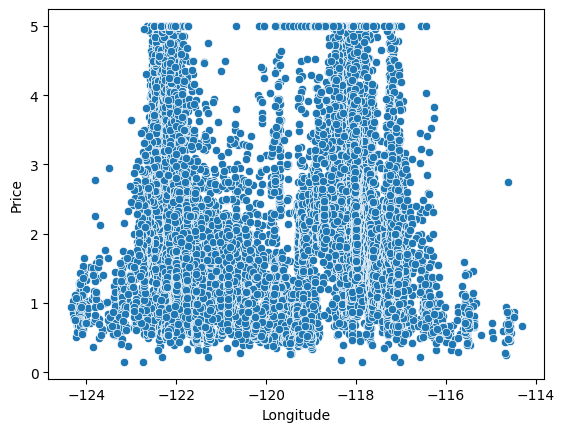

In [8]:
for i in  ['MedInc', 'HouseAge',	'AveRooms',	'AveBedrms', 'Population',	'AveOccup',	'Latitude',	'Longitude']:
    sns.scatterplot(df, x = i, y = 'Price')
    plt.show()

<Axes: >

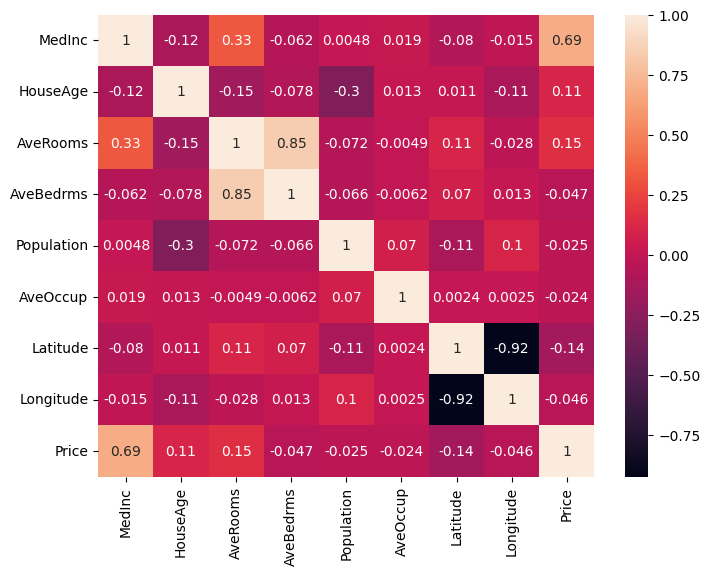

In [9]:
#correlation between variables
corr = df.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size  = 0.2, random_state = 42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def print_metrics(model, x, y_true):
    y_pred = model.predict(x)
    print(' R^2: ', r2_score(y_true, y_pred))
    print(' MAE: ', mean_absolute_error(y_true, y_pred))
    print(' MSE: ', mean_squared_error(y_true, y_pred))

In [13]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(X_train, y_train)
print('Coefficients:', mdl.coef_ ,'Constant:', mdl.intercept_, sep = '\n')

Coefficients:
[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Constant:
2.071946937378619


In [14]:
print_metrics(mdl, X_train, y_train)
print_metrics(mdl, X_test, y_test)

 R^2:  0.6125511913966952
 MAE:  0.5286283596581934
 MSE:  0.5179331255246699
 R^2:  0.575787706032451
 MAE:  0.5332001304956565
 MSE:  0.5558915986952442


In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)
print('Coefficients:', reg.coef_ ,'Constant:', reg.intercept_, sep = '\n')

Coefficients:
[ 0.93594011  0.13205802 -0.38759869  0.53020674  0.04051346 -1.78126342
 -1.27267893 -1.1676299  -0.11222558  0.03784584  0.17978116 -0.1201516
  0.11142996 -0.09883978 -0.66721635 -0.58616928  0.0332914  -0.01624672
  0.05234485  0.0360252  -0.27866746 -0.2767792  -0.25281254  0.06040245
 -0.10958604 -0.15473981  0.57792376  0.54353082  0.47907069  0.04954482
  0.24209969 -0.40169311 -0.48876332 -0.4228783   0.00195178  0.32361526
  0.03280047  0.01523969  0.00769438  0.50676749  0.36713809  0.2632096
  0.4351273   0.15301617]
Constant:
1.956590491804076


In [16]:
print_metrics(reg, X_train_poly, y_train)
print_metrics(reg, X_test_poly, y_test)

 R^2:  0.6852681982344955
 MAE:  0.46083793693991326
 MSE:  0.4207266151573555
 R^2:  0.6456819729261909
 MAE:  0.46700093346965815
 MSE:  0.46430152383012163


In [17]:
#Test degree = 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly.fit_transform(X_train)
X_test_poly3 = poly.fit_transform(X_test)

reg3 = LinearRegression()
reg3.fit(X_train_poly3, y_train)

LinearRegression()

In [18]:
print_metrics(reg3, X_train_poly3, y_train)
print_metrics(reg3, X_test_poly3, y_test)
#Minus R2 and too much MSE value for the 'test set' shows overfitting.

 R^2:  0.7441415681335484
 MAE:  0.41601320035995304
 MSE:  0.3420259770216821
 R^2:  -18.388708058393732
 MAE:  0.5386794932932508
 MSE:  25.407137116210826


Poly degree = 2 + Regularization

Rgularization is a method to add a little bias to the model and reduce variance (Bias-Variance Tradeoff) by setting penalty for the weights so that they will be kept low during gradient descent iteration.\
In lasso, less relevant weights usually become zero but in Ridge they rarely reach 0.


In [19]:
from sklearn.linear_model import Ridge
R2 = Ridge(alpha = 0.5)
R2.fit(X_train_poly, y_train)
print('Coefficients:', R2.coef_ ,'Constant:', R2.intercept_, sep = '\n')

Coefficients:
[ 0.93624198  0.13204032 -0.38802076  0.5303158   0.0403254  -1.77368
 -1.27085493 -1.16612969 -0.11209502  0.03815741  0.17941159 -0.11996616
  0.11163436 -0.0990569  -0.66461906 -0.58377853  0.03334974 -0.01679639
  0.05267894  0.03607835 -0.2791629  -0.27604353 -0.25221193  0.06028354
 -0.1092503  -0.15506413  0.57358944  0.53972371  0.47548139  0.04933095
  0.24222911 -0.39371308 -0.48496499 -0.41934254  0.00198483  0.32169232
  0.03325221  0.0156514   0.0077183   0.50325473  0.36175033  0.26267327
  0.43401869  0.15252732]
Constant:
1.9569932524874842


In [20]:
print_metrics(R2, X_train_poly, y_train)
print_metrics(R2, X_test_poly, y_test)

 R^2:  0.6852673357427883
 MAE:  0.4608947269934062
 MSE:  0.4207277681174774
 R^2:  0.6463021014560553
 MAE:  0.4670257073983739
 MSE:  0.4634889018369239


In [21]:
from sklearn.linear_model import Lasso
L2 = Lasso(alpha=0.001)
L2.fit(X_train_poly, y_train)
print('Coefficients:', L2.coef_ ,'Constant:', L2.intercept_, sep = '\n')

Coefficients:
[ 9.35520018e-01  1.27273990e-01 -3.91454426e-01  5.19338531e-01
  3.37660206e-02 -1.70209246e+00 -1.19264525e+00 -1.10312694e+00
 -1.09390097e-01  4.42232158e-02  1.95566378e-01 -1.38071516e-01
  9.78190892e-02 -1.50029227e-01 -5.26813913e-01 -4.57115160e-01
  3.40468638e-02 -3.22739553e-02  5.99751437e-02  3.26024944e-02
 -2.92963692e-01 -2.51073740e-01 -2.32398883e-01  5.32668538e-03
 -4.32981804e-03 -1.33689345e-01  3.80760231e-01  3.10184770e-01
  2.54200299e-01 -4.91157794e-04  2.05552104e-01 -0.00000000e+00
 -2.53551428e-01 -2.05787079e-01  1.75974369e-03  2.83248595e-01
  1.54066795e-02  0.00000000e+00  1.03380806e-02  4.03826921e-01
  1.75690724e-01  2.02373754e-01  3.06417364e-01  8.64797696e-02]
Constant:
1.9854763006872869


C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.393e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(


In [22]:
print_metrics(L2, X_train_poly, y_train)
print_metrics(L2, X_test_poly, y_test)

 R^2:  0.6830030979089347
 MAE:  0.46374386626481484
 MSE:  0.4237545519200824
 R^2:  0.668674174352767
 MAE:  0.4679138015040801
 MSE:  0.434172336651213


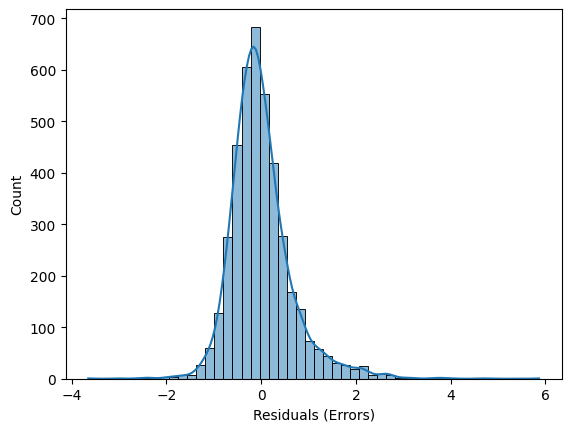

In [23]:
residuals = y_test - L2.predict(X_test_poly)
sns.histplot(residuals, bins = 50, kde = True)
plt.xlabel('Residuals (Errors)')
plt.show()

In [24]:
#As you see the most residuls are around 0 which is a good sign of this model's efficiency.